## EDA on vehicle insurance customer data

In [1]:
import pandas

In [2]:
table1 = pandas.read_csv("customer_details.csv")
table2 = pandas.read_csv("customer_policy_details.csv")
print(table1.head())
print(table2.head())

   0       1   2  3    4  5      6    7
0  1    Male  44  1   21  0  <1yrs  Yes
1  2    Male  34  1    5  1  >2yrs   No
2  3  Female  23  1  323  0  >3yrs  Yes
3  4    Male  54  1  225  1  <1yrs  Yes
4  5  Female  33  1   87  1  <2yrs   No
   0      1    2    3  4
0  1  23600   11  211  1
1  2  34246   11  112  0
2  3  32732  231  232  1
3  4  32754  122  211  0
4  5  24322  122   99  0


In [3]:
table1_labels={'0':'customer_id','1':'gender','2':'age','3':'driving_licence_presence','4':'region_code','5':'previously_insured','6':'vehicle_age','7':'vehicle_damage'}

In [4]:
for i in range(table1.shape[1]):
    print(f"number of cells of {table1_labels[str(i)]} with null values = {table1[str(i)].isnull().sum()}")
table1.info()

number of cells of customer_id with null values = 0
number of cells of gender with null values = 0
number of cells of age with null values = 0
number of cells of driving_licence_presence with null values = 0
number of cells of region_code with null values = 0
number of cells of previously_insured with null values = 0
number of cells of vehicle_age with null values = 0
number of cells of vehicle_damage with null values = 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5 non-null      int64 
 1   1       5 non-null      object
 2   2       5 non-null      int64 
 3   3       5 non-null      int64 
 4   4       5 non-null      int64 
 5   5       5 non-null      int64 
 6   6       5 non-null      object
 7   7       5 non-null      object
dtypes: int64(5), object(3)
memory usage: 448.0+ bytes


In [5]:
table1.dropna(subset=['0'],inplace=True)
print(f"number of cells of {table1_labels[str(0)]} with null values= {table1[str(0)].isnull().sum()}")

number of cells of customer_id with null values= 0


In [6]:
for i in range(2,6):
    table1[str(i)].fillna(table1[str(i)].mean(),inplace=True)
    print(f"number of cells of {table1_labels[str(i)]} with null values= {table1[str(i)].isnull().sum()}")

number of cells of age with null values= 0
number of cells of driving_licence_presence with null values= 0
number of cells of region_code with null values= 0
number of cells of previously_insured with null values= 0


In [7]:
for i in [1,6,7]:
    table1[str(i)].fillna(table1[str(i)].mode()[0],inplace=True)
    print(f"number of cells of {table1_labels[str(i)]} with null values= {table1[str(i)].isnull().sum()}")

number of cells of gender with null values= 0
number of cells of vehicle_age with null values= 0
number of cells of vehicle_damage with null values= 0


In [8]:
table2_labels={'0':'customer_id','1':'annual_premium_INR','2':'sales_channel_code','3':'vintage','4':'response'}

In [9]:
for i in range(table2.shape[1]):
    print(f"number of cells of {table2_labels[str(i)]} with null values is {table2[str(i)].isnull().sum()}")
table2.info()

number of cells of customer_id with null values is 0
number of cells of annual_premium_INR with null values is 0
number of cells of sales_channel_code with null values is 0
number of cells of vintage with null values is 0
number of cells of response with null values is 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       5 non-null      int64
 1   1       5 non-null      int64
 2   2       5 non-null      int64
 3   3       5 non-null      int64
 4   4       5 non-null      int64
dtypes: int64(5)
memory usage: 328.0 bytes


In [10]:
table2.dropna(subset=['0'],inplace=True)
print(f"number of cells of {table2_labels[str(0)]} with null values= {table2[str(0)].isnull().sum()}")

number of cells of customer_id with null values= 0


In [11]:
for i in range(1,5):
    table2[str(i)].fillna(table2[str(i)].mean(),inplace=True)
    print(f"number of cells of {table2_labels[str(i)]} with null values= {table2[str(i)].isnull().sum()}")

number of cells of annual_premium_INR with null values= 0
number of cells of sales_channel_code with null values= 0
number of cells of vintage with null values= 0
number of cells of response with null values= 0


In [12]:
table1_limits={}
for i in range(2,6):
    computations=table1[str(i)].describe(percentiles=[.25,.75])
    mean=computations.values[1]
    Q1=computations.values[4]
    Q3=computations.values[6]
    IQR=Q3-Q1
    II=Q1-1.5*IQR
    hI=Q3+1.5*IQR
    table1_limits[str(i)]=(II,hI)
table1_limits

{'2': (16.5, 60.5), '3': (1.0, 1.0), '4': (-285.0, 531.0), '5': (-1.5, 2.5)}

In [13]:
table1_outliners={'2':0,'3':0,'4':0,'5':0,'6':0}

In [14]:
for j in table1.index:
    for i in range(2,6):
        if (table1_limits[str(i)][0]!=table1_limits[str(i)][1]) and (table1.loc[j,str(i)]>table1_limits[str(i)][1] or table1.loc[j,str(i)]<table1_limits[str(i)][0]):
            table1_outliners[str(i)]+=1
table1_outliners

{'2': 0, '3': 0, '4': 0, '5': 0, '6': 0}

In [15]:
for j in table1.index:
    for i in range(2,6):
        if table1.loc[j,str(i)]<table1_limits[str(i)][0]:
            table1.loc[j,str(i)]=table1[str(i)].mean()
        if table1.loc[j,str(i)]>table1_limits[str(i)][1]:
            table.loc[j,str(i)]=table1[str(i)].mean()

In [16]:
table2_limits={}
for i in range(1,5):
    computations=table2[str(i)].describe(percentiles=[.25,.75])
    mean=computations.values[1]
    Q1=computations.values[4]
    Q3=computations.values[6]
    IQR=Q3-Q1
    II=Q1-1.5*IQR
    hI=Q3+1.5*IQR
    table2_limits[str(i)]=(II,hI)
table2_limits

{'1': (11674.0, 45402.0),
 '2': (-155.5, 288.5),
 '3': (-36.5, 359.5),
 '4': (-1.5, 2.5)}

In [17]:
table2_outliners={'1':0,'2':0,'3':0,'4':0,'5':0}
for j in table2.index:
    for i in range(1,5):
        if (table2_limits[str(i)][0]!=table2_limits[str(i)][1]) and (table2.loc[j,str(i)]>table2_limits[str(i)][1] or table2.loc[j,str(i)]<table2_limits[str(i)][0]):
            table2_outliners[str(i)]+=1
table2_outliners

{'1': 0, '2': 0, '3': 0, '4': 0, '5': 0}

In [18]:
for j in table2.index:
    for i in range(1,5):
        if table2.loc[j,str(i)]<table2_limits[str(i)][0]:
            table2.loc[j,str(i)]=table2[str(i)].mean()
        if table2.loc[j,str(i)]>table2_limits[str(i)][1]:
            table2.loc[j,str(i)]=table2[str(i)].mean()

In [19]:
table1.apply(lambda x:x.str.strip() if x.dtype == "object" else x)

,0,1,2,3,4,5,6,7
0,1,Male,44,1,21,0,<1yrs,Yes
1,2,Male,34,1,5,1,>2yrs,No
2,3,Female,23,1,323,0,>3yrs,Yes
3,4,Male,54,1,225,1,<1yrs,Yes
4,5,Female,33,1,87,1,<2yrs,No


In [20]:
table2.apply(lambda x:x.str.strip() if x.dtype == "object" else x)

,0,1,2,3,4
0,1,23600,11,211,1
1,2,34246,11,112,0
2,3,32732,231,232,1
3,4,32754,122,211,0
4,5,24322,122,99,0


In [21]:
table1.apply(lambda x:x.str.lower() if x.dtype == "object" else x) 

,0,1,2,3,4,5,6,7
0,1,male,44,1,21,0,<1yrs,yes
1,2,male,34,1,5,1,>2yrs,no
2,3,female,23,1,323,0,>3yrs,yes
3,4,male,54,1,225,1,<1yrs,yes
4,5,female,33,1,87,1,<2yrs,no


In [22]:
table2.apply(lambda x:x.str.lower() if x.dtype == "object"else x)

,0,1,2,3,4
0,1,23600,11,211,1
1,2,34246,11,112,0
2,3,32732,231,232,1
3,4,32754,122,211,0
4,5,24322,122,99,0


In [23]:
table1.drop_duplicates(inplace=True)

In [24]:
table2.drop_duplicates(inplace=True)

In [25]:
data=pandas.merge(table1,table2,on='0')
labels={'0':'customer_id','1_x':'gender','2_x':'age','3_x':'driving_license_presence','4_x':'region_code','5':'previously_insured','6':'vehicle_age','7':'vehicle_damage','1_y':'annual_premium_INR','2_y':'sales_channel_code','3_y':'vintage','4_y':'response'}
data.rename(columns=labels,inplace=True)
data

,customer_id,gender,age,driving_license_presence,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium_INR,sales_channel_code,vintage,response
0,1,Male,44,1,21,0,<1yrs,Yes,23600,11,211,1
1,2,Male,34,1,5,1,>2yrs,No,34246,11,112,0
2,3,Female,23,1,323,0,>3yrs,Yes,32732,231,232,1
3,4,Male,54,1,225,1,<1yrs,Yes,32754,122,211,0
4,5,Female,33,1,87,1,<2yrs,No,24322,122,99,0


In [26]:
data.groupby('gender')['annual_premium_INR'].mean()

gender
Female    28527.0
Male      30200.0
Name: annual_premium_INR, dtype: float64

In [27]:
res= data.groupby('age')['annual_premium_INR'].mean()

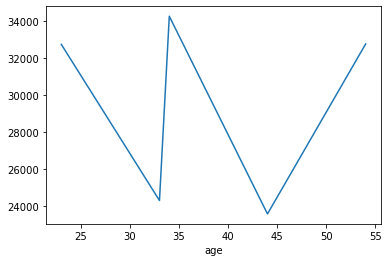

In [28]:
import matplotlib.pyplot as pyplot
res.plot()
pyplot.show()

In [29]:
print(f"male to female ration is {round(data['gender'].value_counts()[0]/data['gender'].value_counts()[1],2)}")
print(f"generally, the standars is: \n balanced data ratio: {50/50} \n slightly balanced data ratio: {round(55/45,2)}-{60/40} \n imbalanced data ratio: {80/20}-{90/10}")

male to female ration is 1.5
generally, the standars is: 
 balanced data ratio: 1.0 
 slightly balanced data ratio: 1.22-1.5 
 imbalanced data ratio: 4.0-9.0


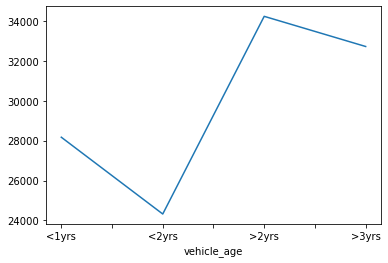

In [30]:
res1= data.groupby('vehicle_age')['annual_premium_INR'].mean()
import matplotlib.pyplot as pyplot
res1.plot()
pyplot.show()

In [31]:
n = data['age'].corr(data['annual_premium_INR'])
if n<-0.5:
    print("Strong negative relationship")
if n>0.5:
    print("Strong positive relationship")
if n>-0.5 and n<0.5:
    print("There is no relationship!")

There is no relationship!
